In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing

In [ ]:
data = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
data.shape

(7043, 21)

In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Finding:**<br>
Total Charges is object type it should be converted to numerical

In [ ]:
data[data['TotalCharges'] == " "]['TotalCharges'].count()

11

there are 11 columns with empty values

In [ ]:
data[data['TotalCharges'] == " "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


we can see tenure is 0 for every row, so we can take the total charges as 0

In [ ]:
#changing data type
#column Total charges should be
data['TotalCharges']= data['TotalCharges'].replace(" ", '0')
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data['TotalCharges'].dtype

dtype('float64')

In [ ]:
#checking null values
for col in data.columns:
    print(col.ljust(20), data[col].isnull().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges         0
Churn                0


In [ ]:
#checking duplicates
data.duplicated().sum()

0

In [ ]:
#checking summary
data.astype('object').describe().T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
SeniorCitizen,7043,2,0,5901
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
tenure,7043,73,1,613
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498


**Understanding categorical data**<br>
checking for unique values

In [ ]:
#cheking unique values of categorical columns
for i, cat_col in enumerate(data.select_dtypes(include="O").columns):
    print(f"{i+1}. {cat_col}: {data[cat_col].nunique()} \n values: {data[cat_col].unique()} \n")

1. customerID: 7043 
 values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK'] 

2. gender: 2 
 values: ['Female' 'Male'] 

3. Partner: 2 
 values: ['Yes' 'No'] 

4. Dependents: 2 
 values: ['No' 'Yes'] 

5. PhoneService: 2 
 values: ['No' 'Yes'] 

6. MultipleLines: 3 
 values: ['No phone service' 'No' 'Yes'] 

7. InternetService: 3 
 values: ['DSL' 'Fiber optic' 'No'] 

8. OnlineSecurity: 3 
 values: ['No' 'Yes' 'No internet service'] 

9. OnlineBackup: 3 
 values: ['Yes' 'No' 'No internet service'] 

10. DeviceProtection: 3 
 values: ['No' 'Yes' 'No internet service'] 

11. TechSupport: 3 
 values: ['No' 'Yes' 'No internet service'] 

12. StreamingTV: 3 
 values: ['No' 'Yes' 'No internet service'] 

13. StreamingMovies: 3 
 values: ['No' 'Yes' 'No internet service'] 

14. Contract: 3 
 values: ['Month-to-month' 'One year' 'Two year'] 

15. PaperlessBilling: 2 
 values: ['Yes' 'No'] 

16. PaymentMethod: 4 
 values: ['Electronic check' 'Mailed check'

In [ ]:
data.drop(columns=['customerID'], inplace=True)

In [ ]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


**Checking Outlier**

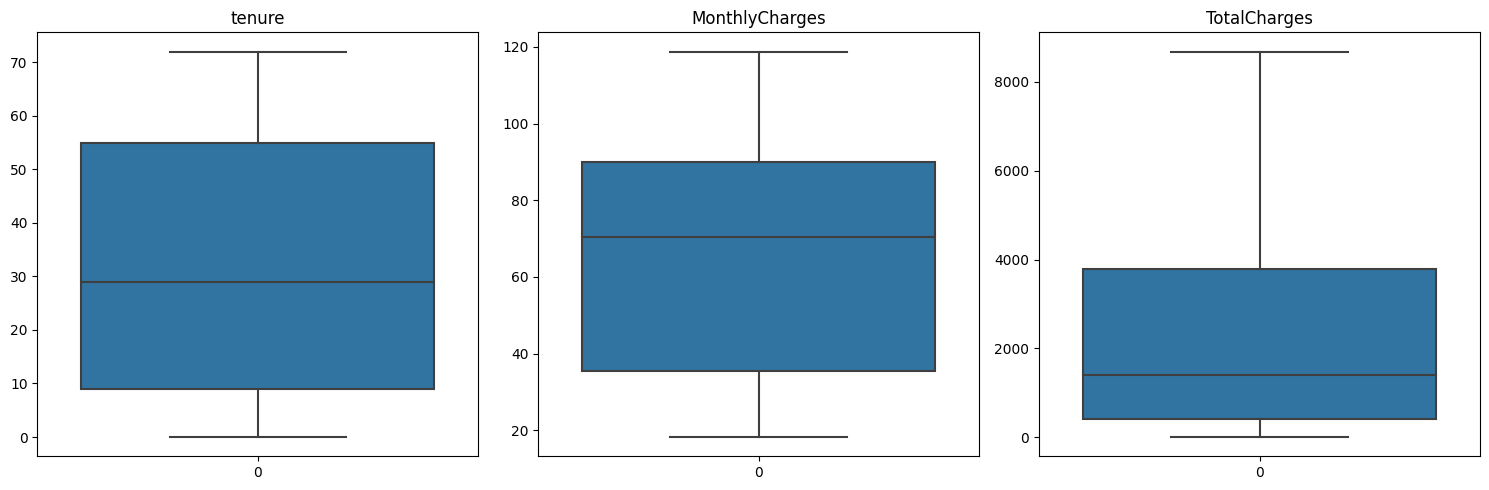

In [ ]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax,col in enumerate(num_cols):
    sns.boxplot(data=data[col], ax=axes[ax])
    axes[ax].set_title(f"{col}")

plt.tight_layout()
plt.show()


No outliers

# EDA

## Univariate Analysis

### Descriptive statistics

In [ ]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


### Visualizations

**1. Overall churn**

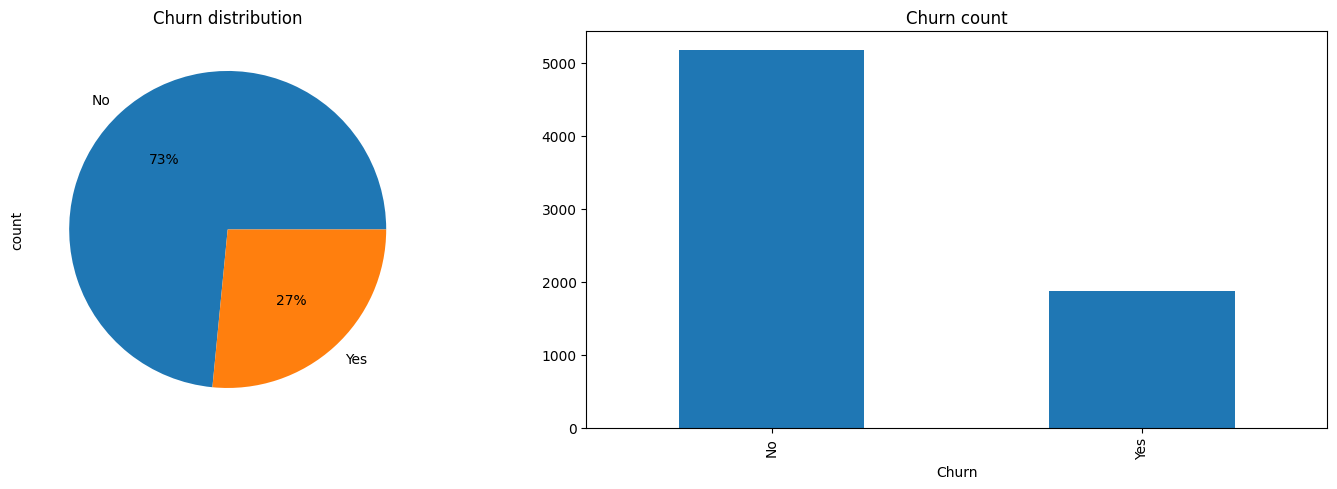

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
data['Churn'].value_counts().plot(kind='pie', autopct= "%.0f%%", ax=axes[0])
axes[0].set_title('Churn distribution')

data['Churn'].value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title('Churn count')
plt.tight_layout()
plt.show()

In [ ]:
#churn rate
y_count=len(data[data['Churn']=='Yes'])
c_rate=y_count/(len(data))*100
print("Churn rate: ",c_rate," %")

Churn rate:  26.536987079369588  %


**2. All categories**

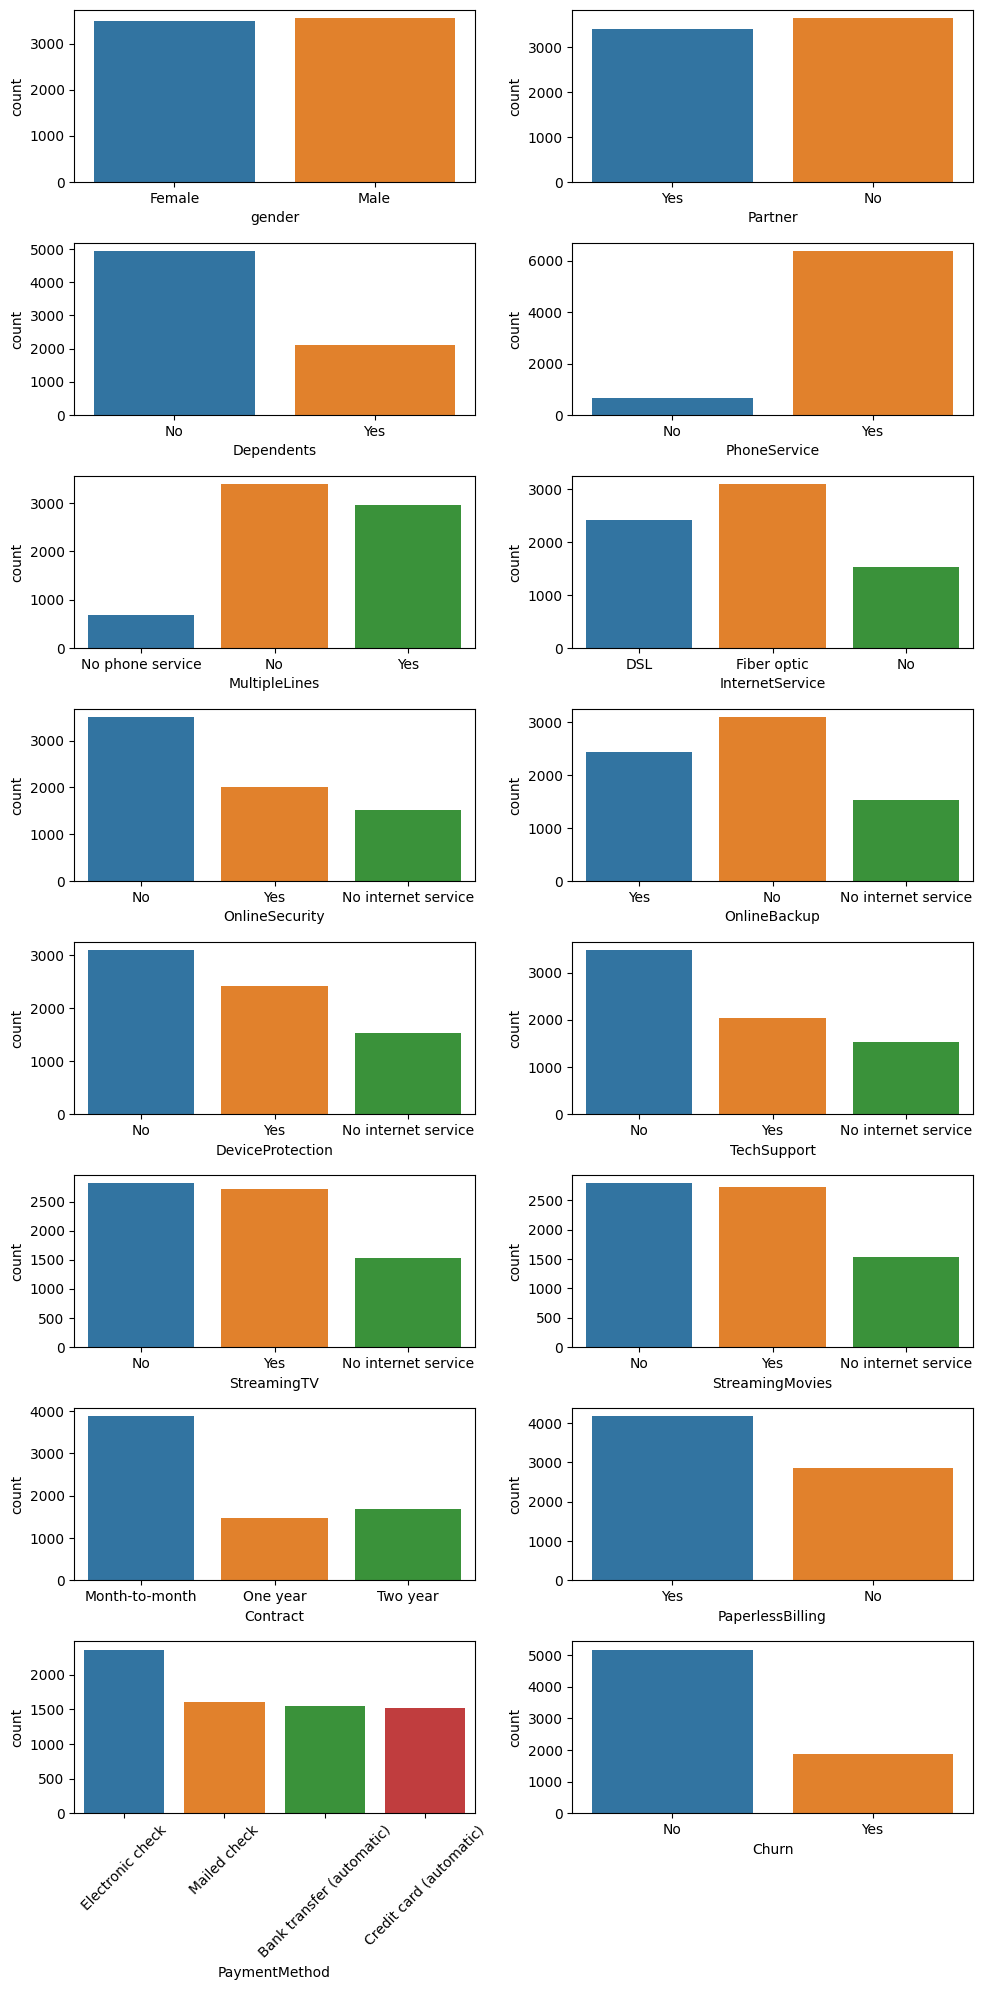

In [ ]:
fig, axes = plt.subplots(8, 2, figsize=(10, 20))
axes = axes.flatten()
for i, cat_col in enumerate(data.select_dtypes(include="O").columns):
    sns.countplot(data=data, x=cat_col, ax=axes[i])

axes[14].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

## Bivariate Analysis

**1. Numerical vs churn**

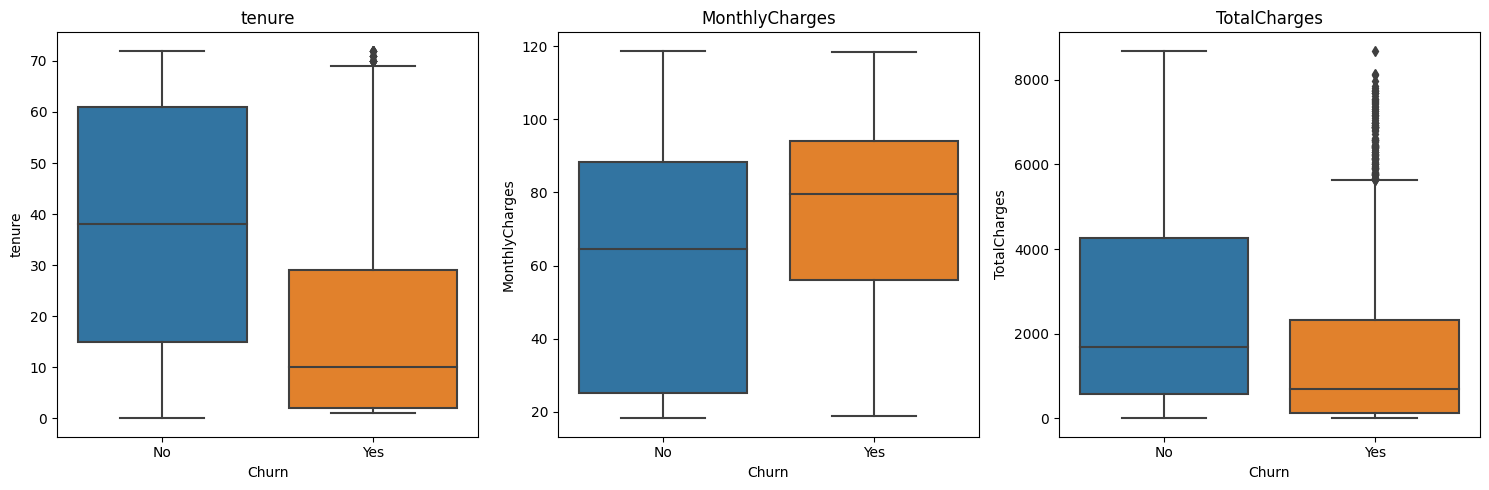

In [ ]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax,col in enumerate(num_cols):
    sns.boxplot(data=data, x='Churn',y=col ,ax=axes[ax])
    axes[ax].set_title(f"{col}")

plt.tight_layout()
plt.show()

**2. Categorical and Churn = yes**

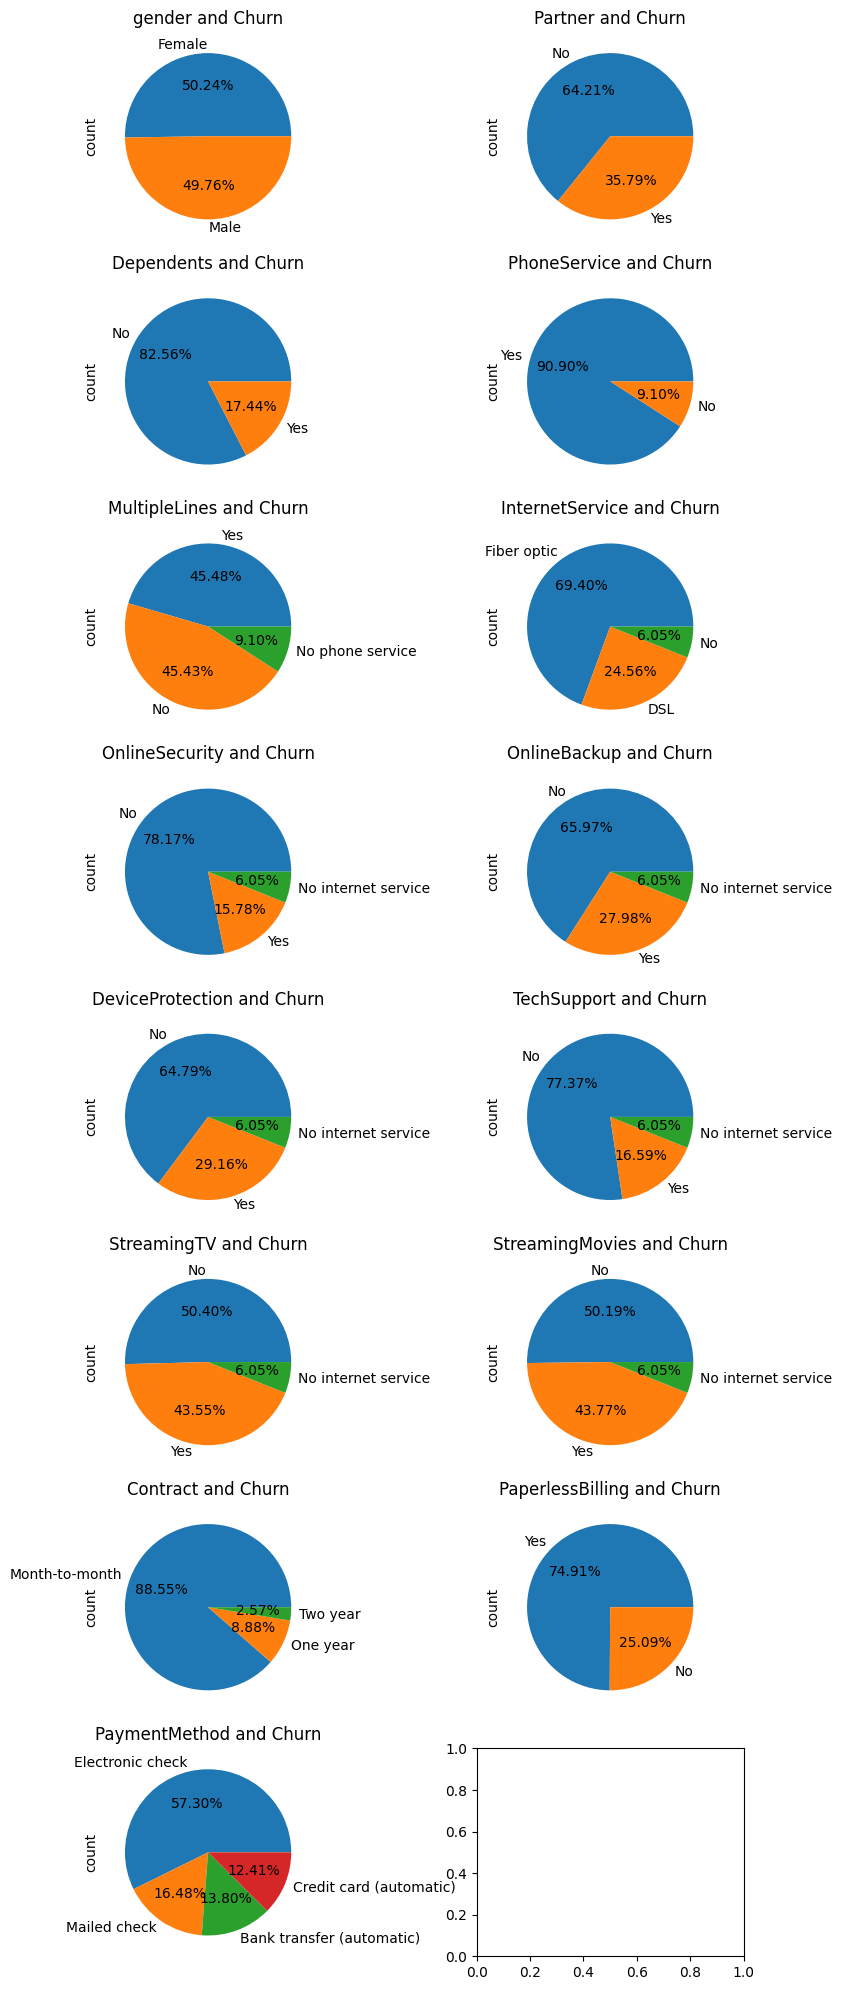

In [ ]:
fig, axes = plt.subplots(8, 2, figsize=(8, 20))
axes = axes.flatten()
cols=data.select_dtypes(include="O").columns
cols=cols.delete(cols.get_loc("Churn"))

for i, cat_col in enumerate(cols):
    data[data['Churn']=='Yes'][cat_col].value_counts().plot(kind='pie', autopct= "%.2f%%",ax=axes[i])
    axes[i].set_title(f"{cat_col} and Churn")

plt.tight_layout()
plt.show()

## Multivariate Analysis

**1. Tenure and Contract**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

<Axes: xlabel='tenure', ylabel='Count'>

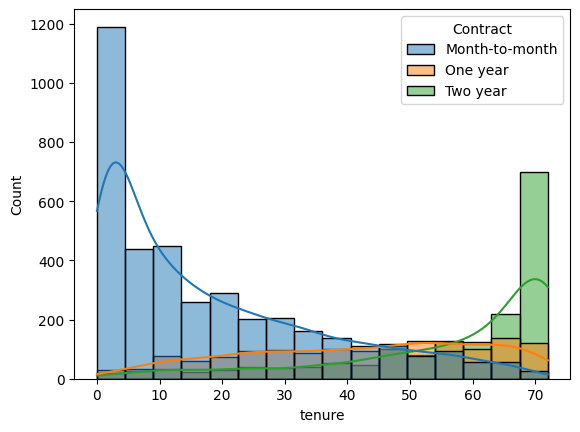

In [ ]:
sns.histplot(data,x='tenure', hue='Contract' ,kde=True)

**2. Numerical columns vs actual churn**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

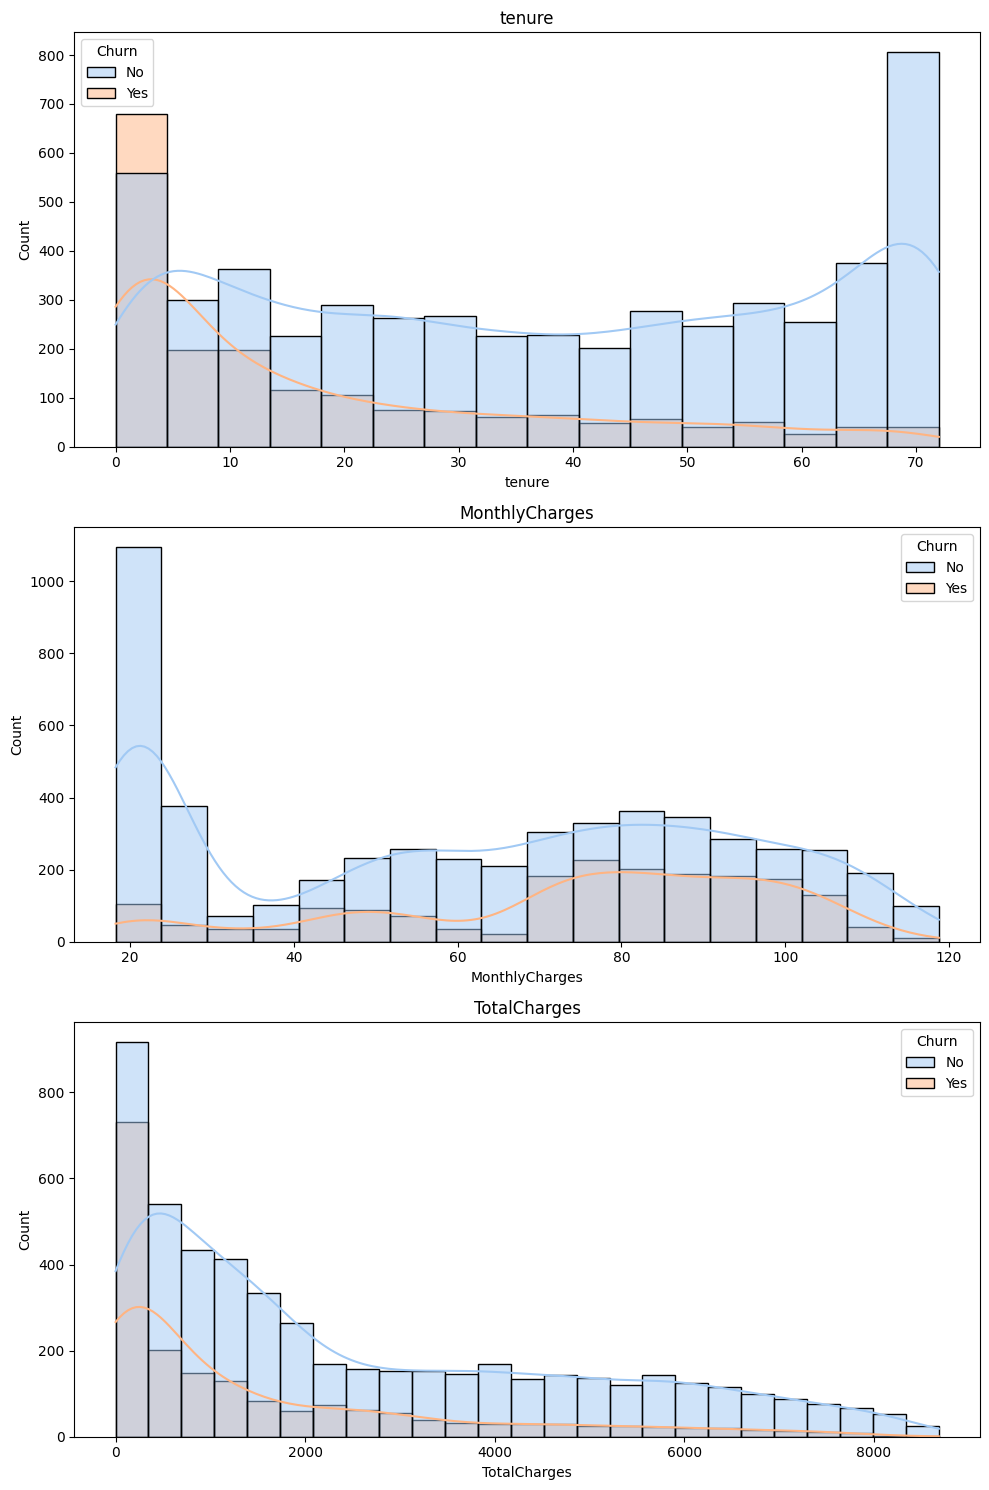

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
for ax,col in enumerate(num_cols):
    sns.histplot(data,hue='Churn', x=col ,kde=True, ax=axes[ax], palette='pastel')
    axes[ax].set_title(f"{col}")
plt.tight_layout()
plt.show()

Findings:
* Chances of leaving decreases with increase in tenure
* Total charges is inversly proprotional to churn

Now to better understand this, dividing it into groups Low, Medium, High

bin_range: tenure [ 0. 24. 48. 72.]
bin_range: MonthlyCharges [ 18.25  51.75  85.25 118.75]
bin_range: TotalCharges [   0.         2894.93333333 5789.86666667 8684.8       ]


/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_

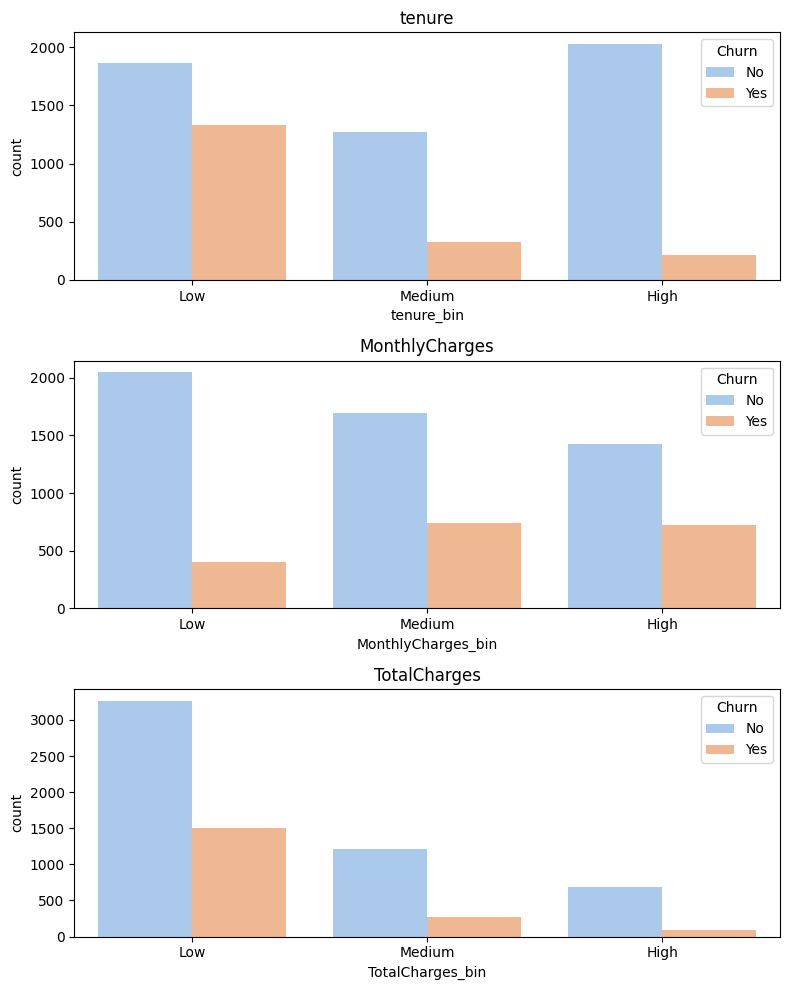

In [ ]:

labels=['Low', 'Medium', 'High']
fig, axes = plt.subplots(3, 1, figsize=(8, 10))
for ax,col in enumerate(num_cols):
    bin_edges=np.linspace(min(data[col]), max(data[col]), 4)
    print(f"bin_range: {col}", bin_edges)
    data[(col+"_bin")] = pd.cut(data[col], bins=bin_edges, labels=labels)
    sns.countplot(data, x=col+"_bin", hue='Churn', ax=axes[ax], palette='pastel')
    axes[ax].set_title(f"{col}")

plt.tight_layout()
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

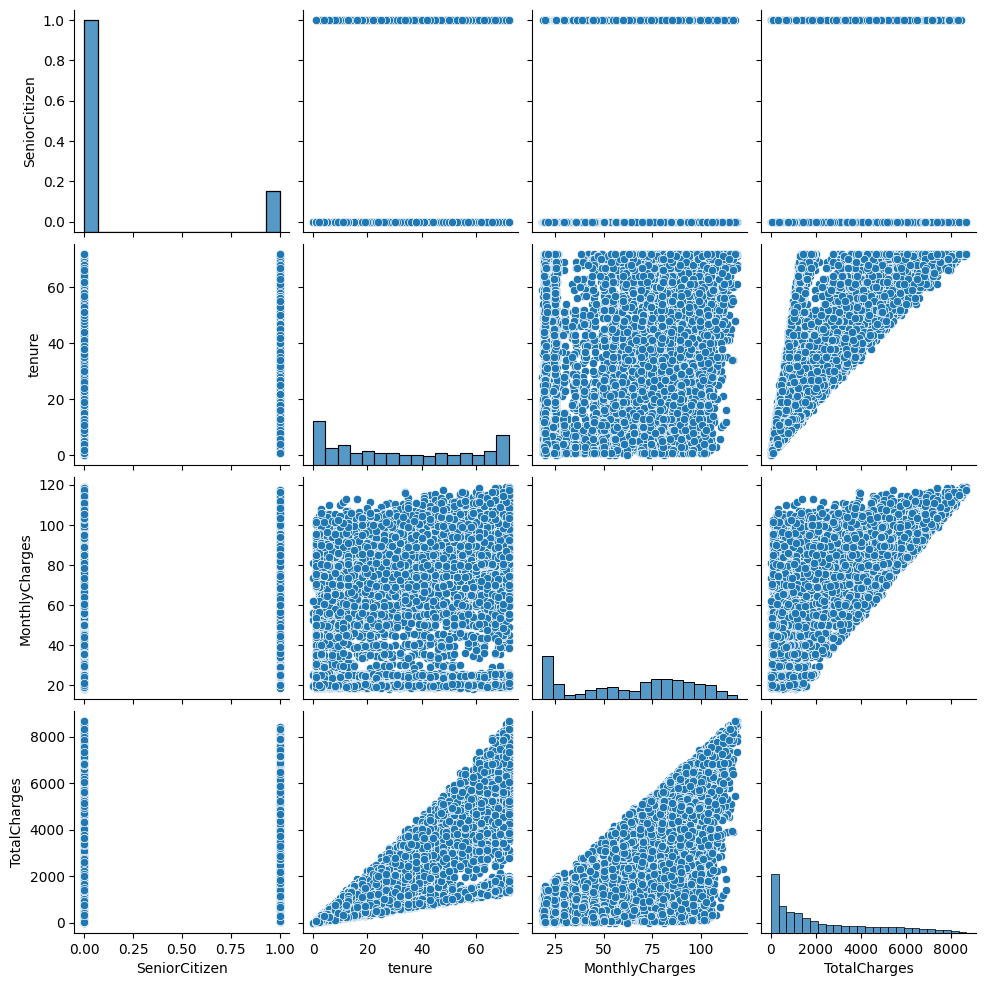

In [ ]:
sns.pairplot(data)

**Findings**<br>
Correlation between tenure-TotalCharges, MonthlyCharges-TotalCharges

# Feature engineering

**Encoding the data**

In [ ]:
from sklearn.preprocessing import LabelEncoder

cat = ["gender","Partner","Dependents","PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling","PaymentMethod","Churn"]
label_df = data
le = LabelEncoder()
for i in cat:
    label_df[i] = le.fit_transform(label_df[i])

In [ ]:
#droppoing the binned columns
label_df.drop(columns=['tenure_bin', 'MonthlyCharges_bin','TotalCharges_bin'], axis=1, inplace=True)
label_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


**One hot encoding**

In [ ]:
category=["MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaymentMethod"]
encode_df = pd.get_dummies(data=label_df, columns= category)
encode_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_0,StreamingMovies_1,StreamingMovies_2,Contract_0,Contract_1,Contract_2,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3
0,0,0,1,0,1,0,1,29.85,29.85,0,...,True,False,False,True,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,True,False,False,False,True,False,False,False,False,True
2,1,0,0,0,2,1,1,53.85,108.15,1,...,True,False,False,True,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,True,False,True,False,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,...,True,False,False,True,False,False,False,False,True,False


**Correlation matrix**

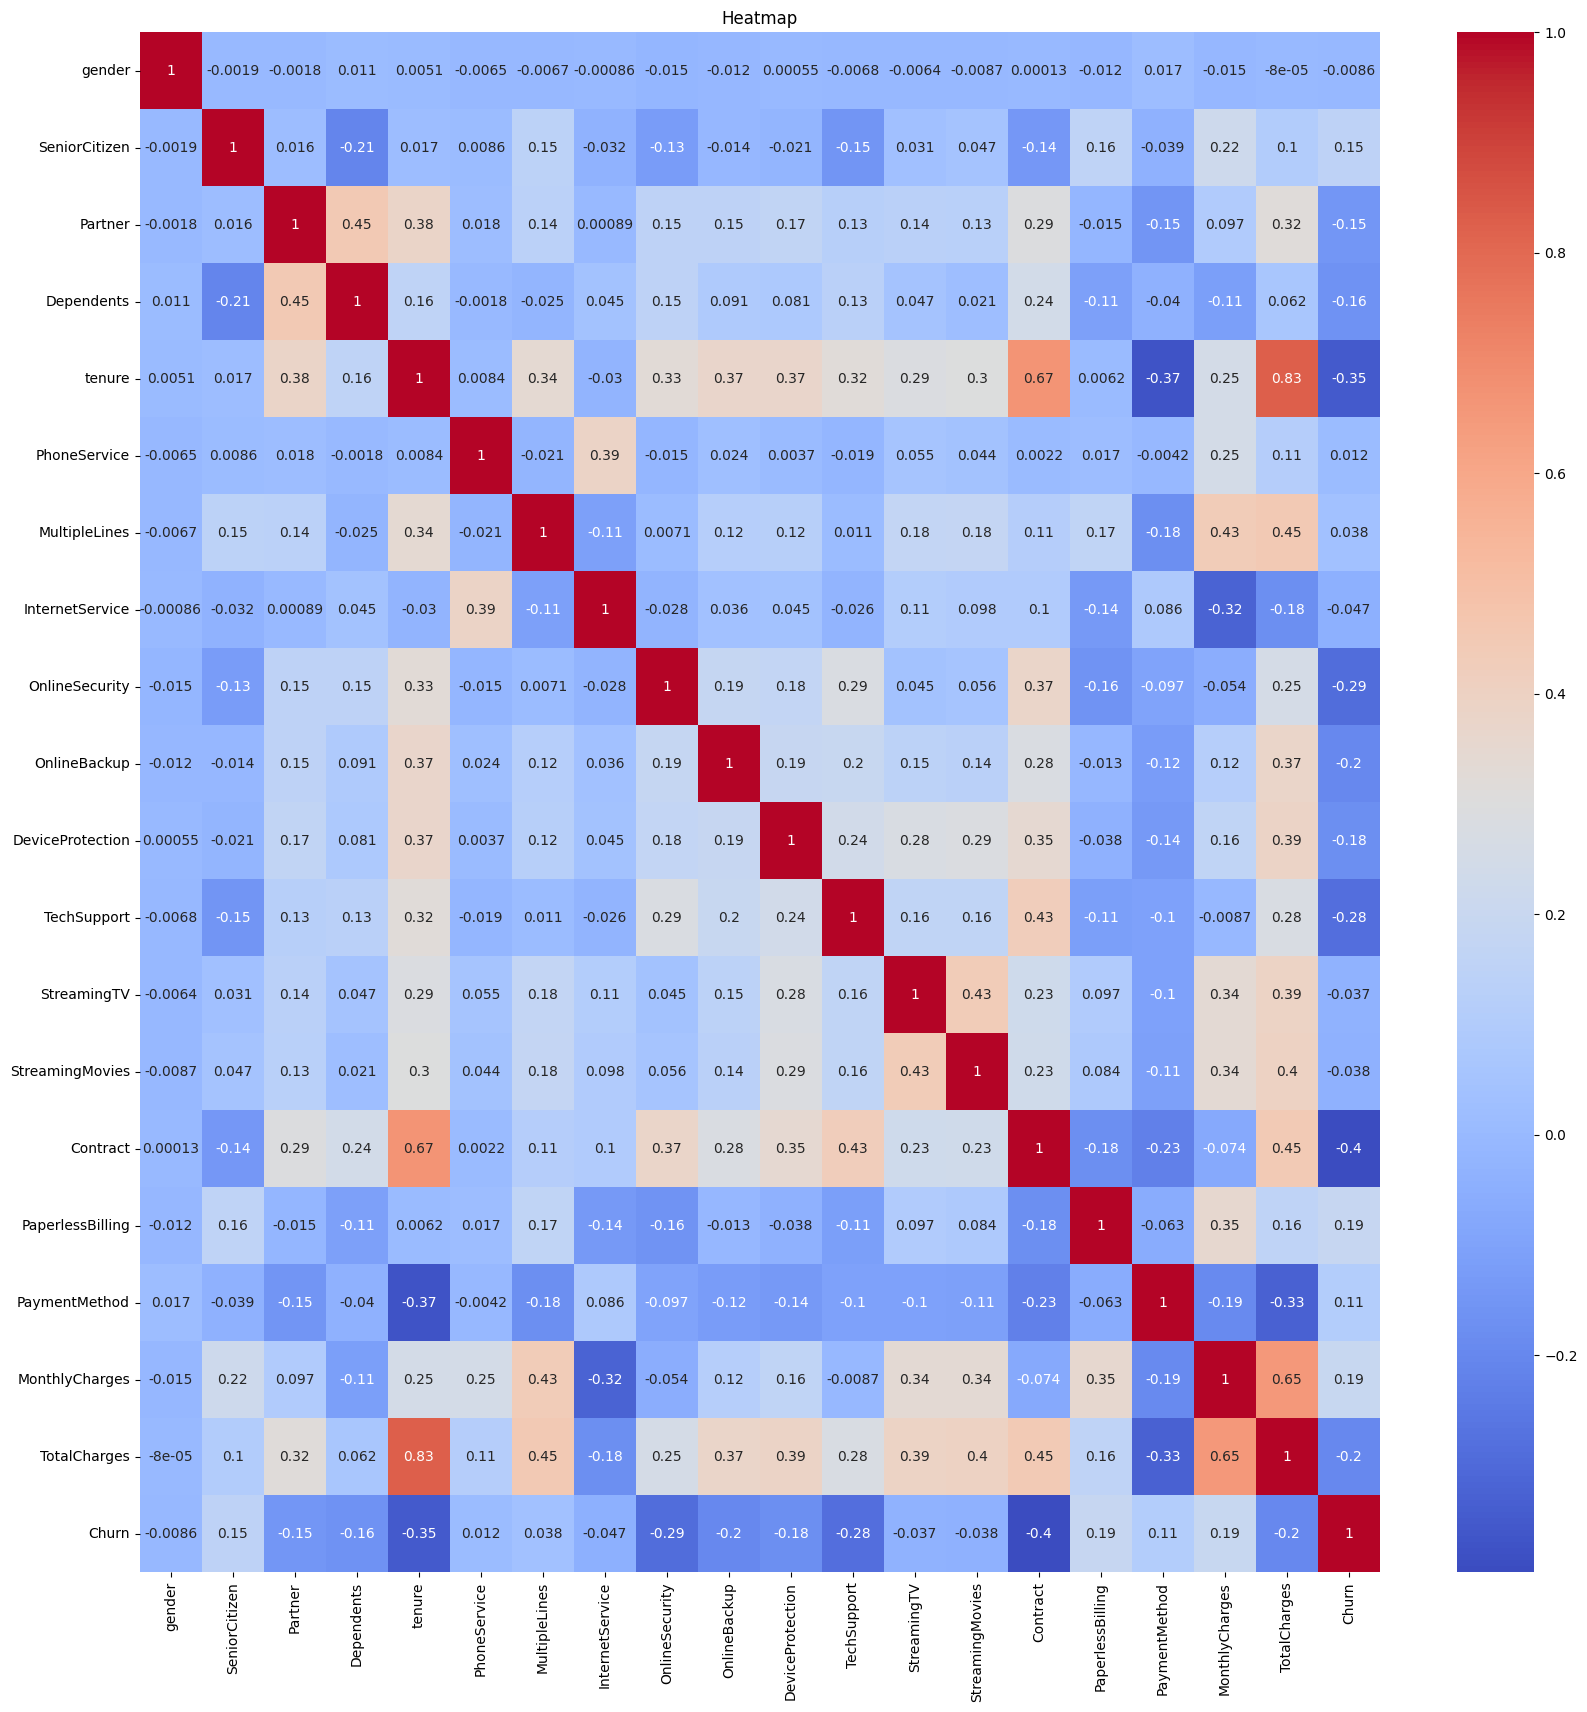

In [ ]:
corr_m=label_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_m,annot=True, cmap='coolwarm')
plt.title('Heatmap')
plt.show()

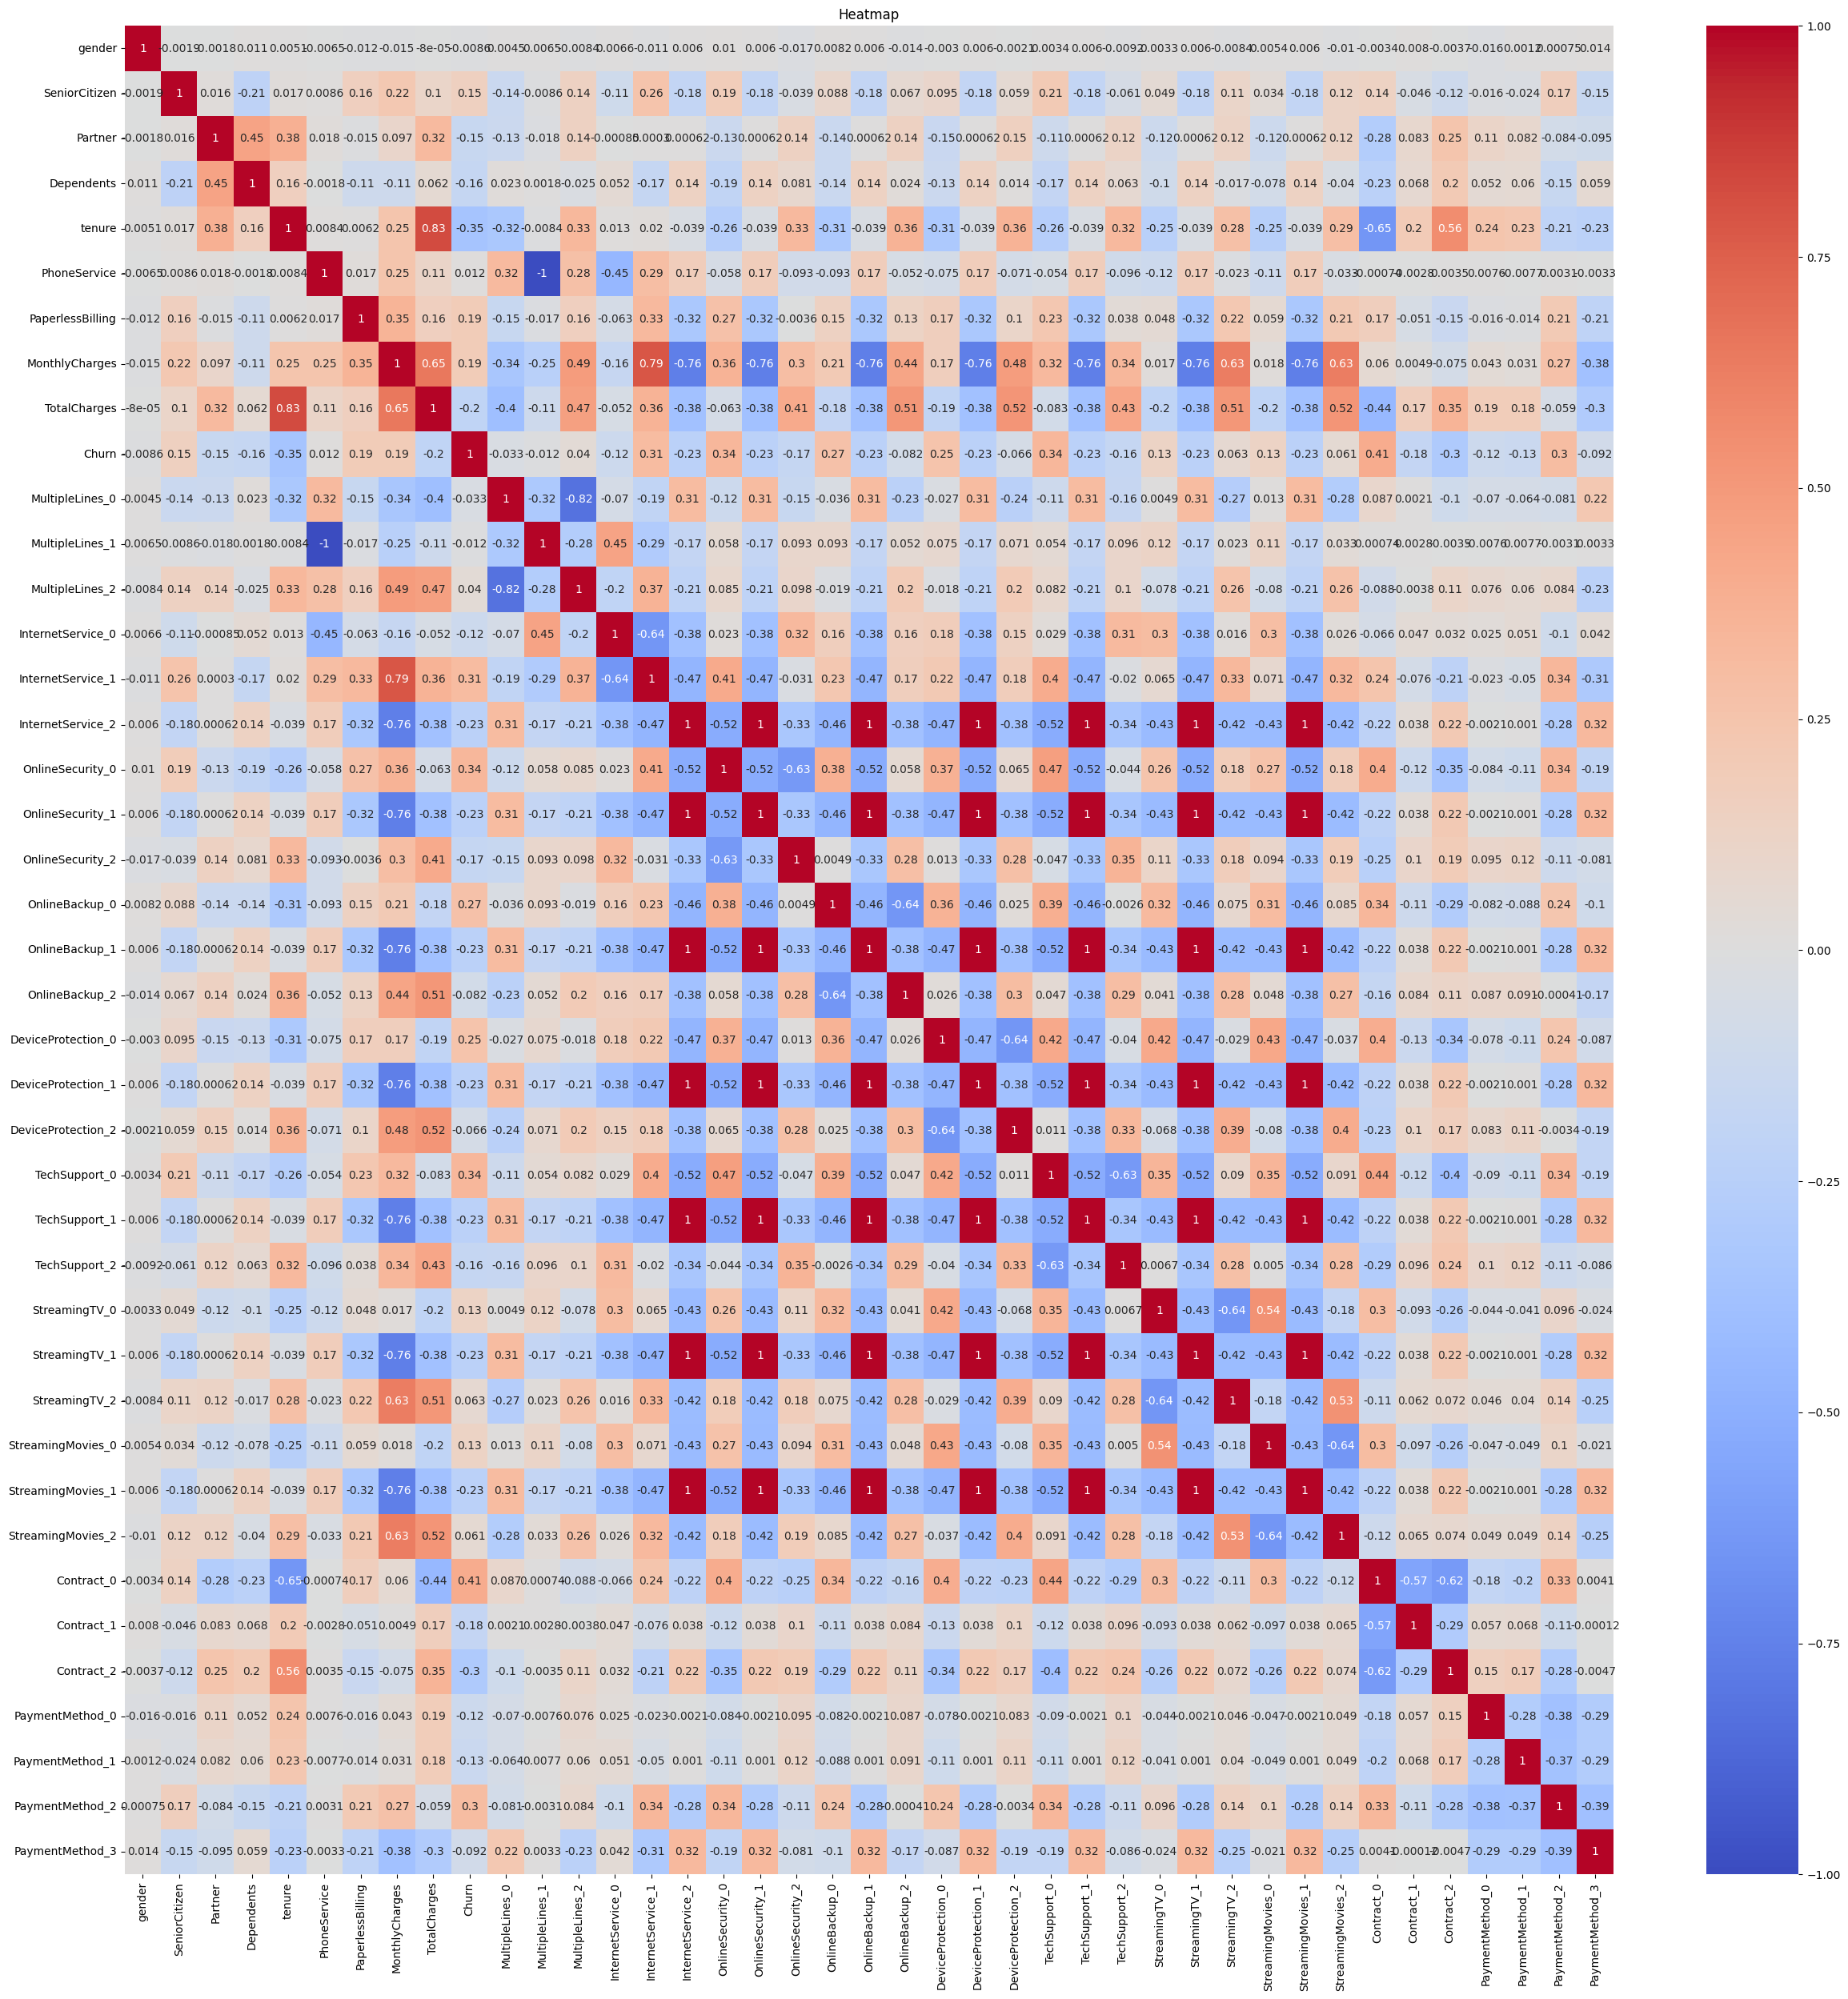

In [ ]:
corr_m2=encode_df.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr_m2, annot=True,cmap='coolwarm')
plt.title('Heatmap')
plt.show()

**Correlated columns**
* tenure-totalcharges
* tenure-contract
* Monthlycharges-totalcharges
* internetservice_2, onlinesecurity_1, onlineBackup_1, DeviceProtection_1, techsupport_1, streamingTV_1, streamingMovies_1 are highly correlated with each other.


# Prediction Model

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df=encode_df.drop(columns=['tenure', 'MonthlyCharges', 'InternetService_2','OnlineSecurity_1','DeviceProtection_1', 'TechSupport_1','StreamingTV_1', 'StreamingMovies_1' ], axis=1)

In [ ]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [ ]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=46, stratify=y)

## Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
model= LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Accuracy: 0.8031235210601041
Confusion Matrix:
[[1404  148]
 [ 268  293]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1552
           1       0.66      0.52      0.58       561

    accuracy                           0.80      2113
   macro avg       0.75      0.71      0.73      2113
weighted avg       0.79      0.80      0.79      2113



## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [ ]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
y_pred_gb = gbc.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_gb)
print(f"Accuracy: {accuracy}")

conf_matrix = confusion_matrix(y_test, y_pred_gb)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, y_pred_gb)
print("Classification Report:")
print(class_report)

Accuracy: 0.8121154756270705
Confusion Matrix:
[[1415  137]
 [ 260  301]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1552
           1       0.69      0.54      0.60       561

    accuracy                           0.81      2113
   macro avg       0.77      0.72      0.74      2113
weighted avg       0.80      0.81      0.80      2113



## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf = rf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy}")

conf_matrix = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, y_pred_rf)
print("Classification Report:")
print(class_report)

Accuracy: 0.7775674396592522
Confusion Matrix:
[[1380  172]
 [ 298  263]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1552
           1       0.60      0.47      0.53       561

    accuracy                           0.78      2113
   macro avg       0.71      0.68      0.69      2113
weighted avg       0.76      0.78      0.77      2113



## Comparing models

Accuracy, Precision, recall, F1 score comparison

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
model_name=['Logistic Regression', 'Gradient Boosting', 'Random Forest']


In [ ]:
accu_list= [accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred_gb),accuracy_score(y_test, y_pred_rf)]
prec_list= [precision_score(y_test, y_pred), precision_score(y_test, y_pred_gb),precision_score(y_test, y_pred_rf)]
rec_list = [recall_score(y_test, y_pred), recall_score(y_test, y_pred_gb),recall_score(y_test, y_pred_rf)]
f1_list = [f1_score(y_test, y_pred), f1_score(y_test, y_pred_gb),f1_score(y_test, y_pred_rf)]

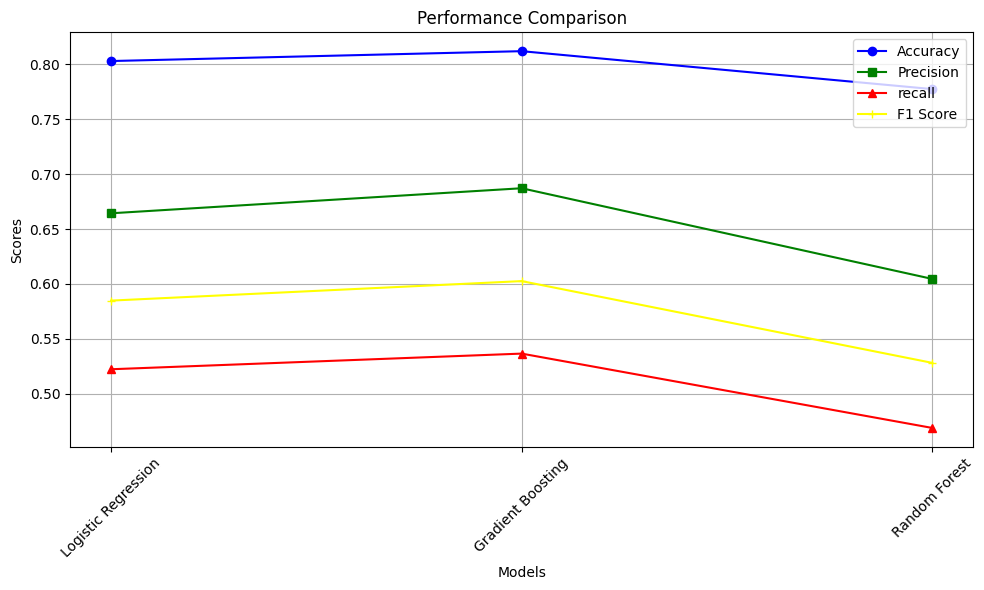

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(model_name, accu_list, marker='o', label='Accuracy', color='blue')

plt.plot(model_name, prec_list, marker='s', label='Precision', color='green')

plt.plot(model_name, rec_list, marker='^', label='recall', color='red')

plt.plot(model_name, f1_list, marker='+', label='F1 Score', color='yellow')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Performance Comparison')
plt.legend()
plt.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()